In [1]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns 

#1 Import feature counts data 

In [3]:
counts = pd.read_csv("../8_create_count_matrix/gene_matrix_count.csv")

import pandas as pd

sex = pd.Series({
    'A1': 'male', 
    'A2': 'male', 
    'A3': 'male', 
    'A4': 'female', 
    'A5': 'male', 
    'A6': 'female', 
    'R8': 'male', 
    'R9': 'female', 
    'R10': 'male', 
    'R11': 'male', 
    'R12': 'male', 
    'R13': 'male', 
    'N14': 'female', 
    'N15': 'male', 
    'N16': 'female', 
    'N17': 'male', 
    'N18': 'female', 
    'N21': 'male'
})
sex_binary = pd.Series({key: 0 if value == 'male' else 1 for key, value in sex.items()})

# reset indx and transform 
counts = counts.set_index('Geneid').T
counts['sex'] = sex_binary[counts.index]
sex = sex[counts.index]

In [4]:
# use standard Scaler from sklearn preprocessing to scale the data
scaler = preprocessing.StandardScaler()
X_scaled  = scaler.fit_transform(counts)

# decomposition from many components to only 2 (to be able to plot it) 
pca = PCA(n_components=2)
counts_transfomred = pca.fit_transform(X_scaled)
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.37863471 0.19499289]


In [5]:
# convert the sample names to uniform condition names for plot legend 
def transform_index_to_number(sample:str)->int:
    """Transform the index of the counts dataframe to a number"""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'

colors = counts.index.map(transform_index_to_number)

In [6]:
counts.index

Index(['R12', 'A5', 'A4', 'A6', 'N16', 'N15', 'R9', 'A1', 'N14', 'R8', 'A3',
       'A2', 'R13', 'R10', 'R11', 'N18', 'N21', 'N17'],
      dtype='object')

In [7]:
colors

Index(['Reoxygenation', 'Anoxia', 'Anoxia', 'Anoxia', 'Normoxia', 'Normoxia',
       'Reoxygenation', 'Anoxia', 'Normoxia', 'Reoxygenation', 'Anoxia',
       'Anoxia', 'Reoxygenation', 'Reoxygenation', 'Reoxygenation', 'Normoxia',
       'Normoxia', 'Normoxia'],
      dtype='object')

# 2 PCA plot 

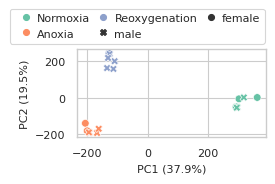

In [8]:
# PLOT 
sns.set_theme(palette = 'Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=((7/2.54), (5/2.54)))
g = sns.scatterplot(x=counts_transfomred[:,0], y=counts_transfomred[:,1], hue=colors, hue_order=['Normoxia', 'Anoxia', 'Reoxygenation'], s=30, style=sex.values, markers=['X', 'o'])
sns.move_legend(g,  markerscale=0.9, loc='lower right', ncol=3, bbox_to_anchor=(1, 1.05), frameon=True, columnspacing=0.2, scatteryoffsets=[0.6], handletextpad=0.01, borderaxespad=0.1)

#g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=2, bbox_to_anchor=(.33, 0.02), frameon=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.tight_layout()
# export 
plt.savefig('PCA_sample_clustering_lncRNAData.svg')